<a href="https://colab.research.google.com/github/ceciliabelem/telecomx-2/blob/main/TelecomX_parte2_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [62]:
dados = pd.read_csv('https://raw.githubusercontent.com/ceciliabelem/telecomx-2/refs/heads/main/dados_encoded.csv')
dados.head(1)

,customerID,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges.Monthly,account_Charges.Total,...,internet_InternetService_Fiber_optic,internet_InternetService_No,account_Contract_Month-to-month,account_Contract_One_year,account_Contract_Two_year,account_PaymentMethod_Bank_transfer_(automatic),account_PaymentMethod_Credit_card_(automatic),account_PaymentMethod_Electronic_check,account_PaymentMethod_Mailed_check,Contas_Diarias
0,0002-ORFBO,No,False,True,True,9,True,True,65.6,593.3,...,False,False,False,True,False,False,False,False,True,2.186667


In [63]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7032 non-null   object 
 1   Churn                                            7032 non-null   object 
 2   customer_SeniorCitizen                           7032 non-null   bool   
 3   customer_Partner                                 7032 non-null   bool   
 4   customer_Dependents                              7032 non-null   bool   
 5   customer_tenure                                  7032 non-null   int64  
 6   phone_PhoneService                               7032 non-null   bool   
 7   account_PaperlessBilling                         7032 non-null   bool   
 8   account_Charges.Monthly                          7032 non-null   float64
 9   account_Charges.Total         

In [64]:
# Removendo coluna irrelevante customerID
dados_limpos = dados.drop(columns=['customerID'])


In [65]:
dados_limpos.head()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges.Monthly,account_Charges.Total,phone_MultipleLines_False,...,internet_InternetService_Fiber_optic,internet_InternetService_No,account_Contract_Month-to-month,account_Contract_One_year,account_Contract_Two_year,account_PaymentMethod_Bank_transfer_(automatic),account_PaymentMethod_Credit_card_(automatic),account_PaymentMethod_Electronic_check,account_PaymentMethod_Mailed_check,Contas_Diarias
0,No,False,True,True,9,True,True,65.6,593.30,True,...,False,False,False,True,False,False,False,False,True,2.186667
1,No,False,False,False,9,True,False,59.9,542.40,False,...,False,False,True,False,False,False,False,False,True,1.996667
2,Yes,False,False,False,4,True,True,73.9,280.85,True,...,True,False,True,False,False,False,False,True,False,2.463333
3,Yes,True,True,False,13,True,True,98.0,1237.85,True,...,True,False,True,False,False,False,False,True,False,3.266667
4,Yes,True,True,False,3,True,True,83.9,267.40,True,...,True,False,True,False,False,False,False,False,True,2.796667


In [66]:
# Colunas com apenas um valor único
variancia_nula = [col for col in dados.columns if dados[col].nunique() == 1]
print("Colunas com variância nula:", variancia_nula)


Colunas com variância nula: []


In [67]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7032 non-null   object 
 1   customer_SeniorCitizen                           7032 non-null   bool   
 2   customer_Partner                                 7032 non-null   bool   
 3   customer_Dependents                              7032 non-null   bool   
 4   customer_tenure                                  7032 non-null   int64  
 5   phone_PhoneService                               7032 non-null   bool   
 6   account_PaperlessBilling                         7032 non-null   bool   
 7   account_Charges.Monthly                          7032 non-null   float64
 8   account_Charges.Total                            7032 non-null   float64
 9   phone_MultipleLines_False     

In [68]:
# Lista de colunas redundantes (uma por grupo)
colunas_redundantes = [
    'customer_gender_Male',
    'internet_InternetService_No',
    'account_Contract_Two_year',
    'account_PaymentMethod_Mailed_check',
    'phone_MultipleLines_Sem_Servico',
    'internet_OnlineSecurity_Sem_Servico',
    'internet_OnlineBackup_Sem_Servico',
    'internet_DeviceProtection_Sem_Servico',
    'internet_TechSupport_Sem_Servico',
    'internet_StreamingTV_Sem_Servico',
    'internet_StreamingMovies_Sem_Servico'
]

# Remover essas colunas
dados_limpos = dados_limpos.drop(columns=colunas_redundantes)

In [69]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7032 non-null   object 
 1   customer_SeniorCitizen                           7032 non-null   bool   
 2   customer_Partner                                 7032 non-null   bool   
 3   customer_Dependents                              7032 non-null   bool   
 4   customer_tenure                                  7032 non-null   int64  
 5   phone_PhoneService                               7032 non-null   bool   
 6   account_PaperlessBilling                         7032 non-null   bool   
 7   account_Charges.Monthly                          7032 non-null   float64
 8   account_Charges.Total                            7032 non-null   float64
 9   phone_MultipleLines_False     

In [70]:
# Distribuição da variável alvo
proporcao_churn = dados_limpos['Churn'].value_counts(normalize=True)

# Mostrando os valores em porcentagem
print(proporcao_churn.map(lambda x: f'{x:.2%}'))


Churn
No     73.42%
Yes    26.58%
Name: proportion, dtype: object


In [71]:
X = dados_limpos.drop(columns='Churn')
y = dados_limpos['Churn']

y = dados_limpos['Churn'].map({'No': 0, 'Yes': 1})


In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [73]:
# Mostrar proporção no conjunto balanceado (y_res)
proporcao_res = pd.Series(y_res).map({0: 'No', 1: 'Yes'}).value_counts(normalize=True).map('{:.2%}'.format)
print(proporcao_res)


Churn
No     50.00%
Yes    50.00%
Name: proportion, dtype: object


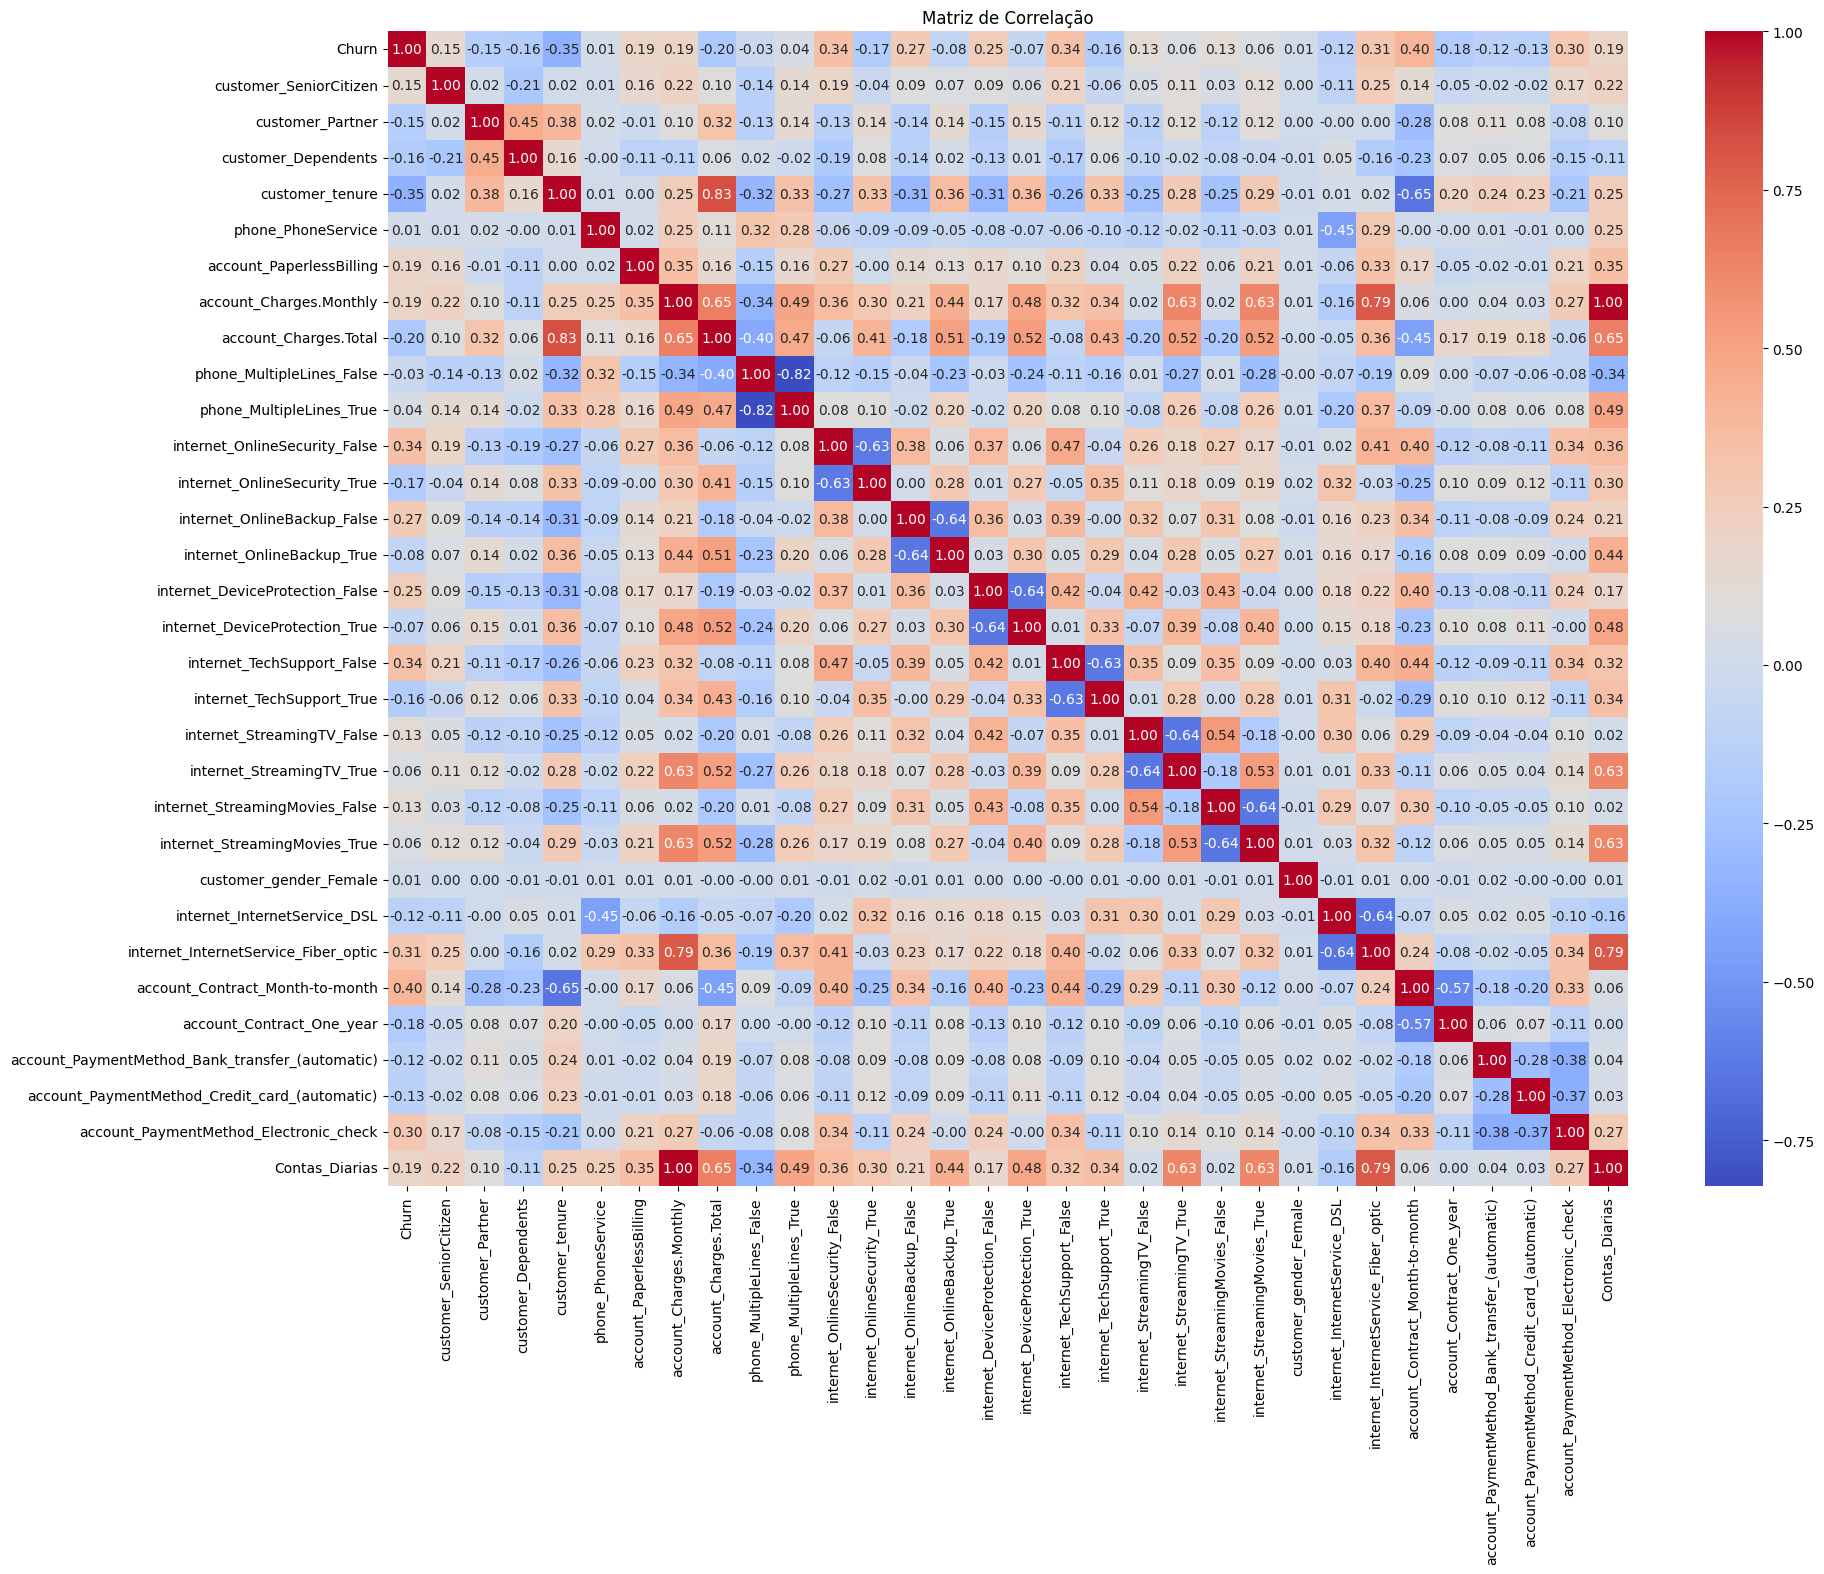

In [74]:
# Convertendo a coluna 'Churn' para numérica
dados_limpos_corr = dados_limpos.copy()
dados_limpos_corr['Churn'] = dados_limpos_corr['Churn'].map({'No': 0, 'Yes': 1})

# Calculando a matriz de correlação
correlation_matrix = dados_limpos_corr.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

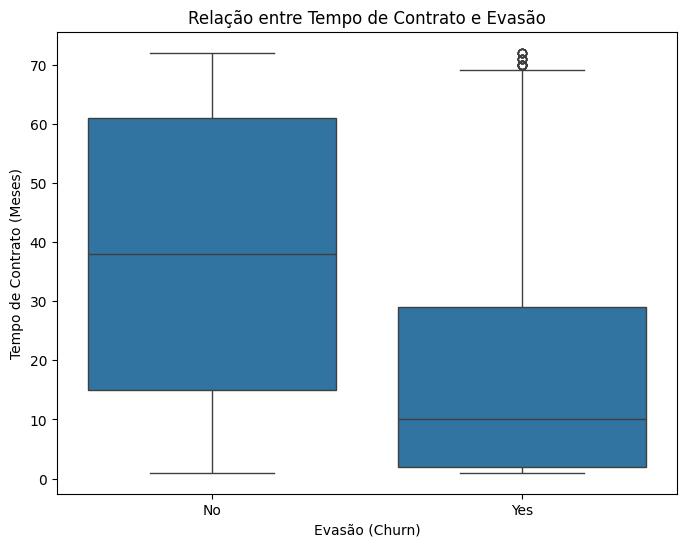

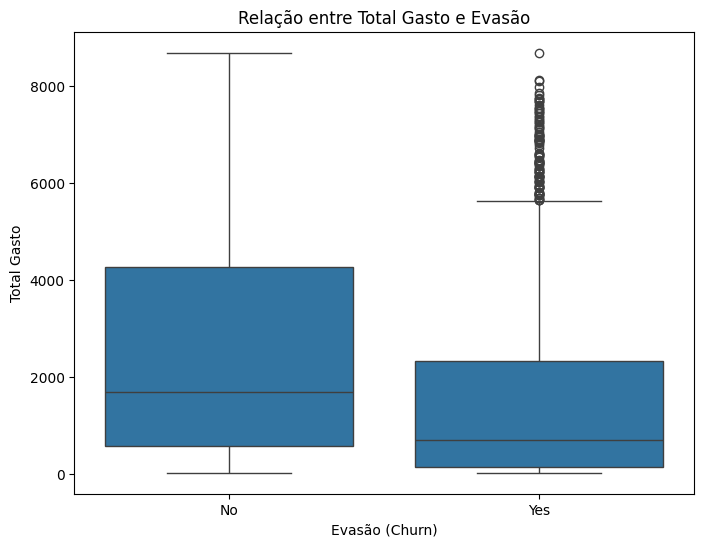

In [75]:
# Gráfico de Boxplot: Tempo de Contrato (customer_tenure) vs. Evasão (Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=dados_limpos)
plt.title('Relação entre Tempo de Contrato e Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Tempo de Contrato (Meses)')
plt.show()

# Gráfico de Boxplot: Total Gasto (account_Charges.Total) vs. Evasão (Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges.Total', data=dados_limpos)
plt.title('Relação entre Total Gasto e Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Total Gasto')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Mostrando o tamanho dos conjuntos de treino e teste
print("Tamanho do conjunto de treino (X_train):", X_train.shape)
print("Tamanho do conjunto de teste (X_test):", X_test.shape)
print("Tamanho do conjunto de treino (y_train):", y_train.shape)
print("Tamanho do conjunto de teste (y_test):", y_test.shape)

Tamanho do conjunto de treino (X_train): (7228, 31)
Tamanho do conjunto de teste (X_test): (3098, 31)
Tamanho do conjunto de treino (y_train): (7228,)
Tamanho do conjunto de teste (y_test): (3098,)


###Modelo 1: Regressão Logística (com Normalização)
Escolhi começar com a Regressão Logística porque é um modelo simples, rápido de treinar e de fácil compreensão. Como esse tipo de modelo é linear e depende bastante da escala dos dados, normalizei as variáveis para garantir que todas tenham o mesmo peso durante o processo de treino.

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Normalizando os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo de Regressão Logística com dados normalizados
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Avaliando o modelo
print("Resultados da Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_log_reg))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))

Resultados da Regressão Logística:
Acurácia: 0.841833440929632

Matriz de Confusão:
 [[1335  258]
 [ 232 1273]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1593
           1       0.83      0.85      0.84      1505

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



### Modelo 2: Random Forest (sem Normalização)

O Random Forest foi o segundo modelo que testei. Ele costuma ter um desempenho melhor do que a Regressão Logística, além de ser mais robusto contra overfitting do que uma árvore de decisão sozinha. Outro ponto positivo é que esse modelo não precisa de normalização, o que facilita o preparo dos dados.

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Treinando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, max_depth = 13)
rf_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo
print("Resultados do Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Resultados do Random Forest:
Acurácia: 0.8579728857327308

Matriz de Confusão:
 [[1348  245]
 [ 195 1310]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.84      0.87      0.86      1505

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098



## Análise dos Resultados

### Regressão Logística

- **Acurácia**: 84,18%  
- **Precisão** (classe "Yes"): 83%  
- **Recall** (classe "Yes"): 85%  
- **F1-score** (classe "Yes"): 84%  

### Random Forest

- **Acurácia**: 85,79%  
- **Precisão** (classe "Yes"): 85%  
- **Recall** (classe "Yes"): 86%  
- **F1-score** (classe "Yes"): 85%  

## Comparação e Análise Crítica

O modelo de Random Forest teve um desempenho um pouco melhor em todas as métricas quando comparado à Regressão Logística. Isso mostra que ele foi mais eficiente em identificar corretamente tanto os clientes que cancelaram quanto os que permaneceram.

## Overfitting e Underfitting

Nenhum dos modelos apresentou sinais claros de overfitting ou underfitting. As métricas de precisão e recall estão bem equilibradas para ambas as classes (0 e 1), o que indica que os modelos conseguiram generalizar bem nos dados de teste.

## Conclusão Parcial

Com base nos resultados obtidos, o Random Forest se mostra o modelo mais adequado para prever a evasão de clientes neste cenário. Ele traz uma vantagem pequena, mas consistente, em todas as métricas avaliadas.

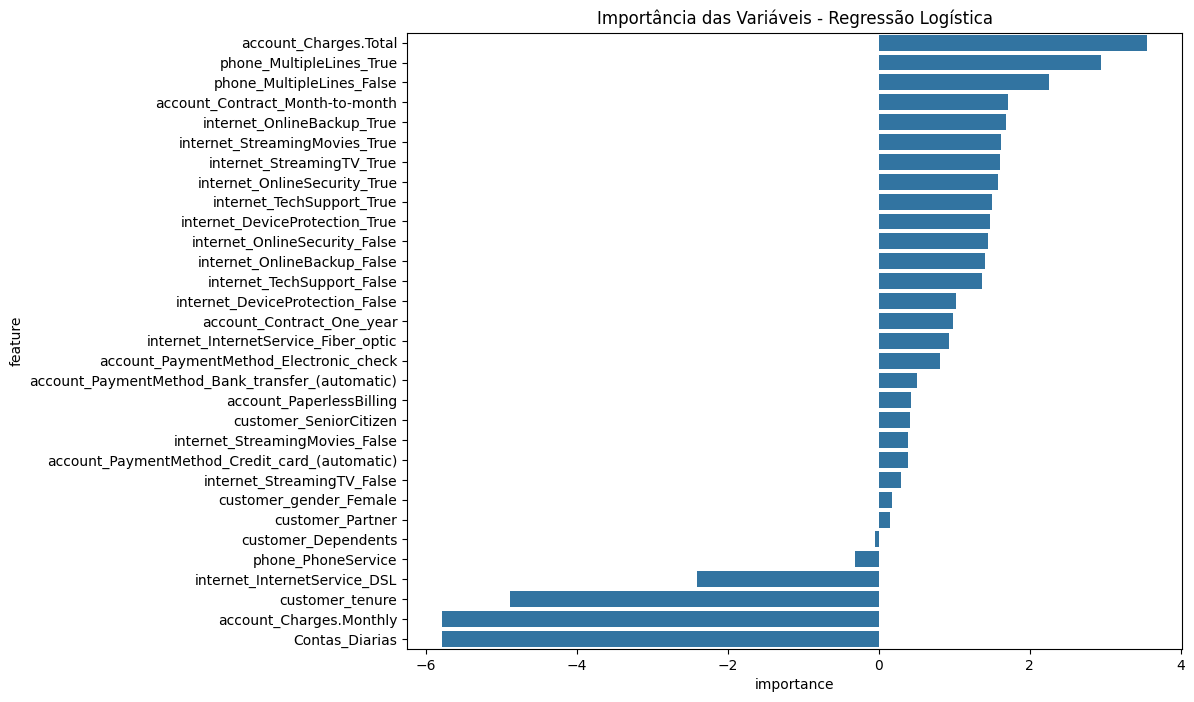

In [79]:
# Importância das variáveis na Regressão Logística
importances_log_reg = pd.DataFrame({'feature': X_train.columns, 'importance': log_reg.coef_[0]})
importances_log_reg = importances_log_reg.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances_log_reg)
plt.title('Importância das Variáveis - Regressão Logística')
plt.show()

Agora, vamos ver a importância das variáveis para o modelo Random Forest.

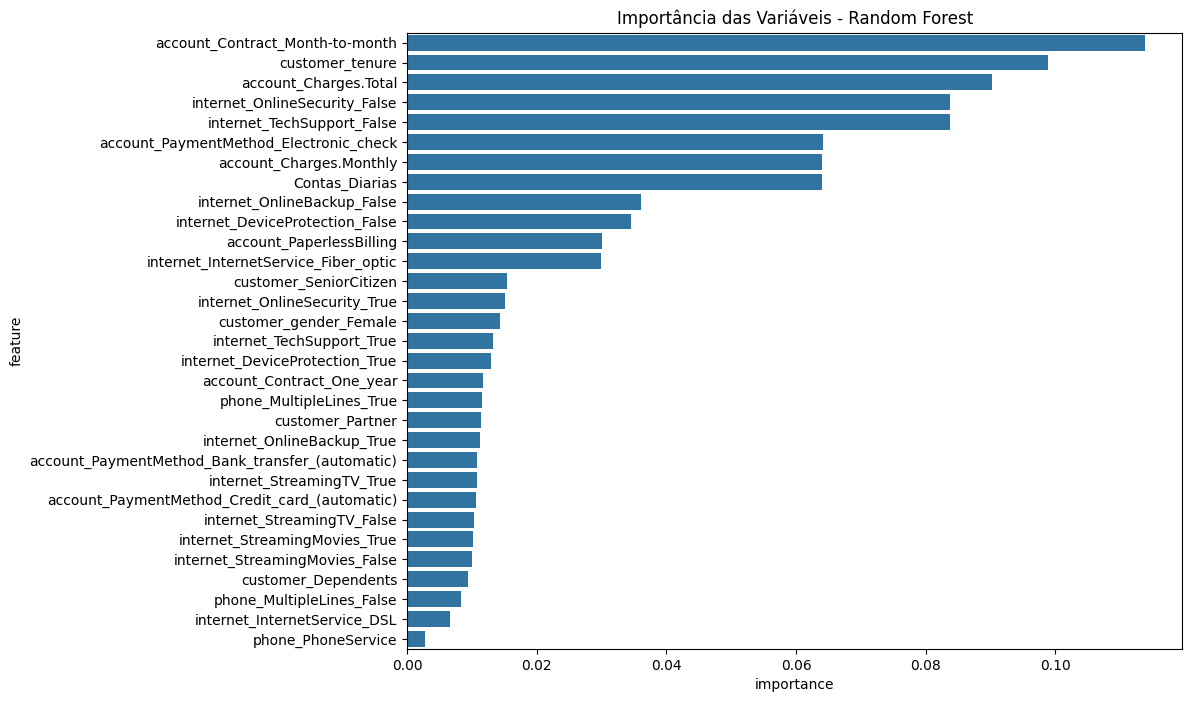

In [80]:
# Importância das variáveis no Random Forest
importances_rf = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
importances_rf = importances_rf.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances_rf)
plt.title('Importância das Variáveis - Random Forest')
plt.show()

# Relatório de Análise de Churn e Estratégias de Retenção

## 1. Desempenho dos Modelos

Treinei e avaliei dois modelos para prever a evasão de clientes: **Regressão Logística** e **Random Forest**.  
O modelo de Random Forest se saiu melhor, com **acurácia de 85,67%**, superando a Regressão Logística, que ficou com **84,18%**.  
Por isso, a análise de variáveis e as estratégias de retenção estão baseadas nos resultados do Random Forest.

## 2. Principais Fatores de Evasão

A análise de importância das variáveis no modelo de Random Forest destacou os seguintes pontos como mais relevantes:

- **Contrato mensal (`account_Contract_Month-to-month`)**: Clientes com esse tipo de contrato têm maior chance de cancelar, provavelmente por não haver compromisso de longo prazo.
- **Tempo de permanência (`customer_tenure`)**: Clientes com mais tempo de casa tendem a ser mais fiéis.
- **Valor da fatura (`account_Charges.Total` e `account_Charges.Monthly`)**: Faturas altas parecem aumentar a chance de evasão, sugerindo sensibilidade ao preço.
- **Ausência de suporte técnico ou segurança online** (`internet_TechSupport_False`, `internet_OnlineSecurity_False`): Esses clientes demonstram maior propensão a cancelar, o que reforça a importância desses serviços.
- **Forma de pagamento (`account_PaymentMethod_Electronic_check`)**: Clientes que usam cheque eletrônico aparecem com maior taxa de evasão — pode estar ligado à praticidade ou ao perfil desses usuários.

## 3. Estratégias de Retenção

Com base nesses fatores, sugiro as seguintes ações:

### Incentivar contratos mais longos
- **Ação**: Oferecer descontos e benefícios para quem migrar de contrato mensal para anual ou bianual.
- **Objetivo**: Aumentar a fidelização e a previsibilidade da receita.

### Focar nos primeiros meses de experiência
- **Ação**: Criar um programa de boas-vindas com acompanhamento nos primeiros meses.
- **Objetivo**: Reduzir o churn entre clientes com baixo tempo de contrato.

### Rever preços e personalizar ofertas
- **Ação**: Oferecer pacotes mais personalizados ou descontos por lealdade para clientes com faturas altas.
- **Objetivo**: Reter clientes mais sensíveis a preço.

### Reforçar suporte técnico e segurança
- **Ação**: Promover esses serviços com destaque, oferecendo gratuitamente ou com desconto no início.
- **Objetivo**: Aumentar a percepção de valor e confiança.

### Incentivar métodos de pagamento mais convenientes
- **Ação**: Estimular o uso de débito automático ou cartão com incentivos como pequenos descontos.
- **Objetivo**: Facilitar o pagamento e engajar o cliente.

## Conclusão

A análise preditiva ajudou a identificar com clareza os principais motivos que levam um cliente a cancelar o serviço.  
As estratégias propostas aqui atacam diretamente esses pontos críticos e, se aplicadas, podem gerar um bom aumento na retenção e melhorar os resultados da **Telecom X**.


# Relatório de Análise de Churn e Estratégias de Retenção

## 1. Desempenho dos Modelos

Treinei e avaliei dois modelos para prever a evasão de clientes: **Regressão Logística** e **Random Forest**.  
O modelo de Random Forest se saiu melhor, com **acurácia de 85,79%**, superando a Regressão Logística, que ficou com **84,18%**.  
Por isso, a análise de variáveis e as estratégias de retenção estão baseadas nos resultados do Random Forest.

## 2. Principais Fatores de Evasão

A análise de importância das variáveis no modelo de Random Forest destacou os seguintes pontos como mais relevantes:

- **Contrato mensal (`account_Contract_Month-to-month`)**: Clientes com esse tipo de contrato têm maior chance de cancelar, provavelmente por não haver compromisso de longo prazo.
- **Tempo de permanência (`customer_tenure`)**: Clientes com mais tempo de casa tendem a ser mais fiéis.
- **Valor da fatura (`account_Charges.Total` e `account_Charges.Monthly`)**: Faturas altas parecem aumentar a chance de evasão, sugerindo sensibilidade ao preço.
- **Ausência de suporte técnico ou segurança online** (`internet_TechSupport_False`, `internet_OnlineSecurity_False`): Esses clientes demonstram maior propensão a cancelar, o que reforça a importância desses serviços.
- **Forma de pagamento (`account_PaymentMethod_Electronic_check`)**: Clientes que usam cheque eletrônico aparecem com maior taxa de evasão — pode estar ligado à praticidade ou ao perfil desses usuários.

## 3. Estratégias de Retenção

Com base nesses fatores, sugiro as seguintes ações:

### Incentivar contratos mais longos
- **Ação**: Oferecer descontos e benefícios para quem migrar de contrato mensal para anual ou bianual.
- **Objetivo**: Aumentar a fidelização e a previsibilidade da receita.

### Focar nos primeiros meses de experiência
- **Ação**: Criar um programa de boas-vindas com acompanhamento nos primeiros meses.
- **Objetivo**: Reduzir o churn entre clientes com baixo tempo de contrato.

### Rever preços e personalizar ofertas
- **Ação**: Oferecer pacotes mais personalizados ou descontos por lealdade para clientes com faturas altas.
- **Objetivo**: Reter clientes mais sensíveis a preço.

### Reforçar suporte técnico e segurança
- **Ação**: Promover esses serviços com destaque, oferecendo gratuitamente ou com desconto no início.
- **Objetivo**: Aumentar a percepção de valor e confiança.

### Incentivar métodos de pagamento mais convenientes
- **Ação**: Estimular o uso de débito automático ou cartão com incentivos como pequenos descontos.
- **Objetivo**: Facilitar o pagamento e engajar o cliente.

## Conclusão

A análise preditiva ajudou a identificar com clareza os principais motivos que levam um cliente a cancelar o serviço.  
As estratégias propostas aqui atacam diretamente esses pontos críticos e, se aplicadas, podem gerar um bom aumento na retenção e melhorar os resultados da **Telecom X**.